# Plot examples of each type of planets

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from util import *

In [42]:
data_M23 = pickle.load(open('data/M23.pkl','rb'))
# add HD 37124 (example of Jupiter triplet) to the table
data_M23['system'] = np.concatenate((data_M23['system'],['HD 37124']*3))
data_M23['m_star_msun'] = np.concatenate((data_M23['m_star_msun'],[0.85]*3))
data_M23['m_p_mearth'] = np.concatenate((data_M23['m_p_mearth'],[215,207,221]))
data_M23['r_p_rearth'] = np.concatenate((data_M23['r_p_rearth'],[np.nan]*3))
data_M23['a_p_au'] = np.concatenate((data_M23['a_p_au'],[0.53364,1.71,2.807]))

In [47]:
i_system = 0
def plot_systems(data, system_name=None, m_max_min=Mjup/Mearth, m_max_max=np.inf, i_system_lim=(1,np.inf)):
    if system_name is not None:
        if data['system']!=system_name: return
    if len(data['m_p_mearth'])<2: return
    global i_system
    i_system -= 1
    if -i_system < i_system_lim[0] or -i_system > i_system_lim[1]: return
    m = data['m_p_mearth']
    q = data['m_p_mearth']/data['m_star_msun'] * Mearth/Msun
    a = data['a_p_au']
    
    
    ms_rel_min = 0.1
    m_max = min(max(np.amax(np.nan_to_num(m,0)), m_max_min), m_max_max)
    ms_rel = (np.nan_to_num(m,0)/m_max)**.5
    ms_rel = np.maximum(np.minimum(ms_rel, 1), ms_rel_min)
    
    x = a
    plt.plot([.01,100],[i_system, i_system],'k',lw=.5)
    for i in range(len(m)):
        c = 'dimgrey'
        if q[i]>5.151e-5:
            c = 'tab:orange'
        if q[i]>1e-5 and q[i]<5.151e-5: # neptune
            c = 'tab:green'
        plt.plot([x[i]], [i_system], 'o', color=c, ms=ms_rel[i]*15)
    plt.text(1e-2, i_system+.2, data['system'][0])
    return

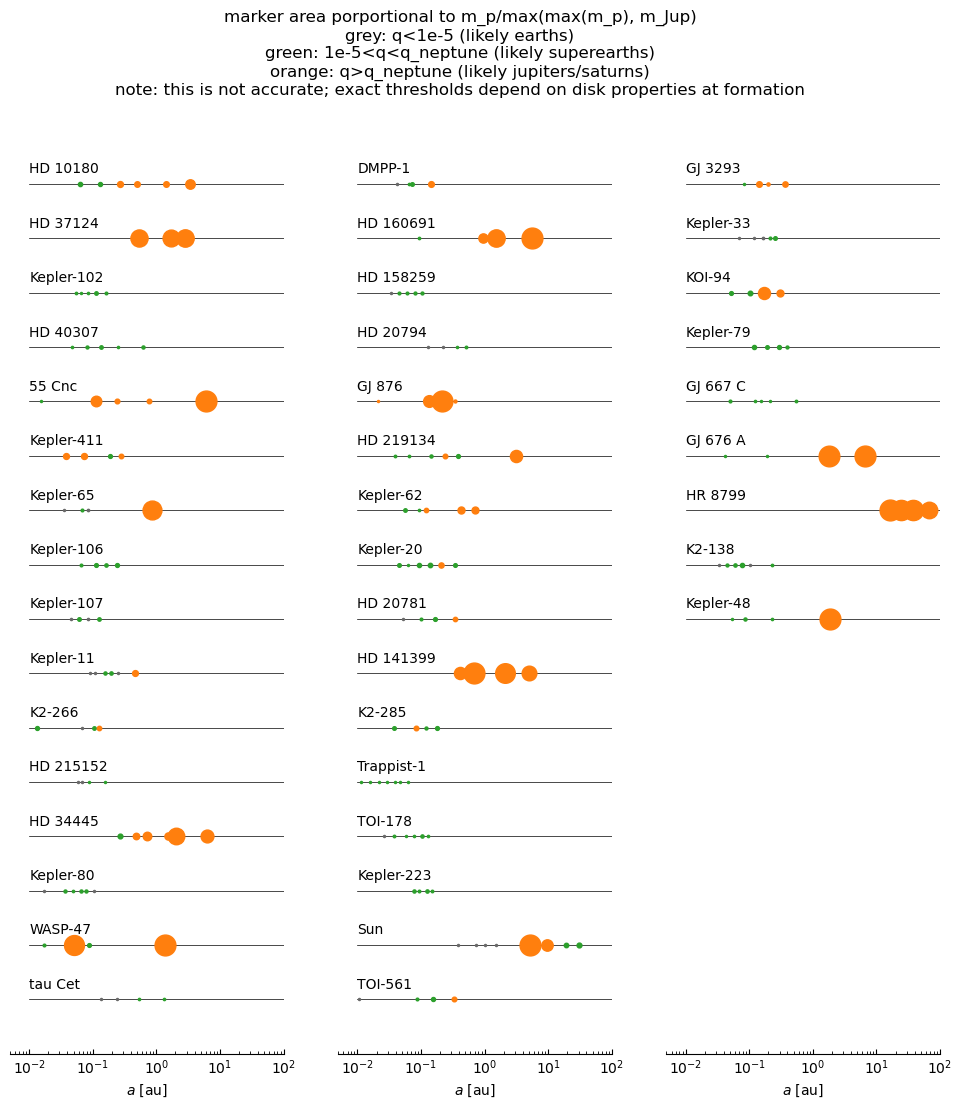

In [54]:
fig, ax = plt.subplots(1,3,figsize=(12,12))

m_max_min, m_max_max = Mjup/Mearth, np.inf

plt.sca(ax[0])
i_system = 0
process_data(data_M23, plot_systems, i_system_lim=(1,16), m_max_min=m_max_min, m_max_max=m_max_max)
plt.ylim([-17,0])
plt.xscale('log'); plt.xlim(5e-3,1e2); plt.xlabel(r'$a$ [au]')
plt.gca().spines[['left','right', 'top']].set_visible(False)
plt.gca().tick_params(which='both',direction='in')
plt.yticks([])

plt.sca(ax[1])
i_system = 0
process_data(data_M23, plot_systems, i_system_lim=(17,32), m_max_min=m_max_min, m_max_max=m_max_max)
plt.ylim([-33,-16])
plt.xscale('log'); plt.xlim(5e-3,1e2); plt.xlabel(r'$a$ [au]')
plt.gca().spines[['left','right', 'top']].set_visible(False)
plt.gca().tick_params(which='both',direction='in')
plt.yticks([])

plt.sca(ax[2])
i_system = 0
process_data(data_M23, plot_systems, i_system_lim=(33,np.inf), m_max_min=m_max_min, m_max_max=m_max_max)
plt.ylim([-49,-32])
plt.xscale('log'); plt.xlim(5e-3,1e2); plt.xlabel(r'$a$ [au]')
plt.gca().spines[['left','right', 'top']].set_visible(False)
plt.gca().tick_params(which='both',direction='in')
plt.yticks([])

plt.suptitle('marker area porportional to m_p/max(max(m_p), m_Jup)\ngrey: q<1e-5 (likely earths)\ngreen: 1e-5<q<q_neptune (likely superearths)\norange: q>q_neptune (likely jupiters/saturns)\nnote: this is not accurate; exact thresholds depend on disk properties at formation')
plt.show()

In [61]:
i_system = 0
def plot_systems(data, system_name=None, m_max_min=0, m_max_max=np.inf, q_max_min=None, q_max_max=None, i_system_lim=(1,np.inf),
                 highlight_inds=[]):
    """
    highlight_inds = planet indices to be highlighted
                     use highlight_inds=[-1]/[-2]/[-3] to highlight superearths/earths/giants (defined by q)
    """
    if system_name is not None:
        if data['system'][0]!=system_name: return
    if len(data['m_p_mearth'])<2: return
    global i_system
    i_system -= 1
    if -i_system < i_system_lim[0] or -i_system > i_system_lim[1]: return
    m = data['m_p_mearth']
    q = data['m_p_mearth']/data['m_star_msun'] * Mearth/Msun
    a = data['a_p_au']

    # set marker size
    ms_rel_min = 0.1
    if q_max_min is not None:
        m_max_min = q_max_min*Msun/Mearth*data['m_star_msun'][0]
        m_max_max = q_max_max*Msun/Mearth*data['m_star_msun'][0]
    m_max = min(max(np.amax(np.nan_to_num(m,0)), m_max_min), m_max_max)
    ms_rel = (np.nan_to_num(m,0)/m_max)**.5
    ms_rel = np.maximum(np.minimum(ms_rel, np.inf), ms_rel_min)

    # choose which planets to highlight
    if len(highlight_inds)==1:
        if highlight_inds[0]<0:
            if highlight_inds[0]==-1: # SE
                highlight_inds = (q>1e-5)*(q<5.151e-5)
            elif highlight_inds[0]==-2: # earths
                highlight_inds = (q<1e-5)
            elif highlight_inds[0]==-3: # giants
                highlight_inds = q>5.151e-5
            highlight_inds = list(np.arange(len(highlight_inds))[highlight_inds])
            #print(highlight_inds)

    # compute std(log_m) of highlighted planets and set highlight color
    m_std_ind = highlight_inds
    color = 'dimgrey'
    if len(m_std_ind)>0:
        if len(m_std_ind)==1:
            if m_std_ind[0]>0: m_std_ind = [m_std_ind[0]-1]+m_std_ind
            if m_std_ind[-1]<len(m)-1: m_std_ind = m_std_ind+[m_std_ind[0]+1]
        log_m_std = np.nanstd(np.log(m)[m_std_ind])
        if log_m_std<np.log(1.5):
            color = 'tab:blue'
        elif log_m_std<np.log(2):
            color = 'dimgrey'
        else:
            color = 'tab:red'
        plt.text(1e-2, i_system+.17, r'$\Delta\log m =$'+'{:.2f}'.format(log_m_std), ha='left', color=color)

    # print name
    name = data['system'][0]
    if name=='Sun': name='Solar System'
    plt.text(1e-2, i_system+.4, name)

    # plot the planets
    x = a
    plt.plot([.01,100],[i_system, i_system],'k',lw=.5)
    for i in range(len(m)):
        marker='o'
        mew = .5
        mec = 'dimgrey'
        c = 'w'
        zindex = 10
        if np.isnan(m[i]) or m[i]==0:
            c = 'k'
            marker = 'x'
            mec = 'dimgrey'
            ms_rel[i] = .15
        if i in highlight_inds:
            c = color
            mec = 'w'
            mew =  .5
            zindex = 99
        plt.plot([x[i]], [i_system], marker, color=c, ms=ms_rel[i]*30+mew*.5, mew=mew, mec=mec, zorder=zindex, clip_on=False)    
    return

/var/folders/w3/86cy1mvn3t5_sxhyqdwmz6bm0000gq/T/ipykernel_481/1808592126.py:46: RuntimeWarning: divide by zero encountered in log
  log_m_std = np.nanstd(np.log(m)[m_std_ind])


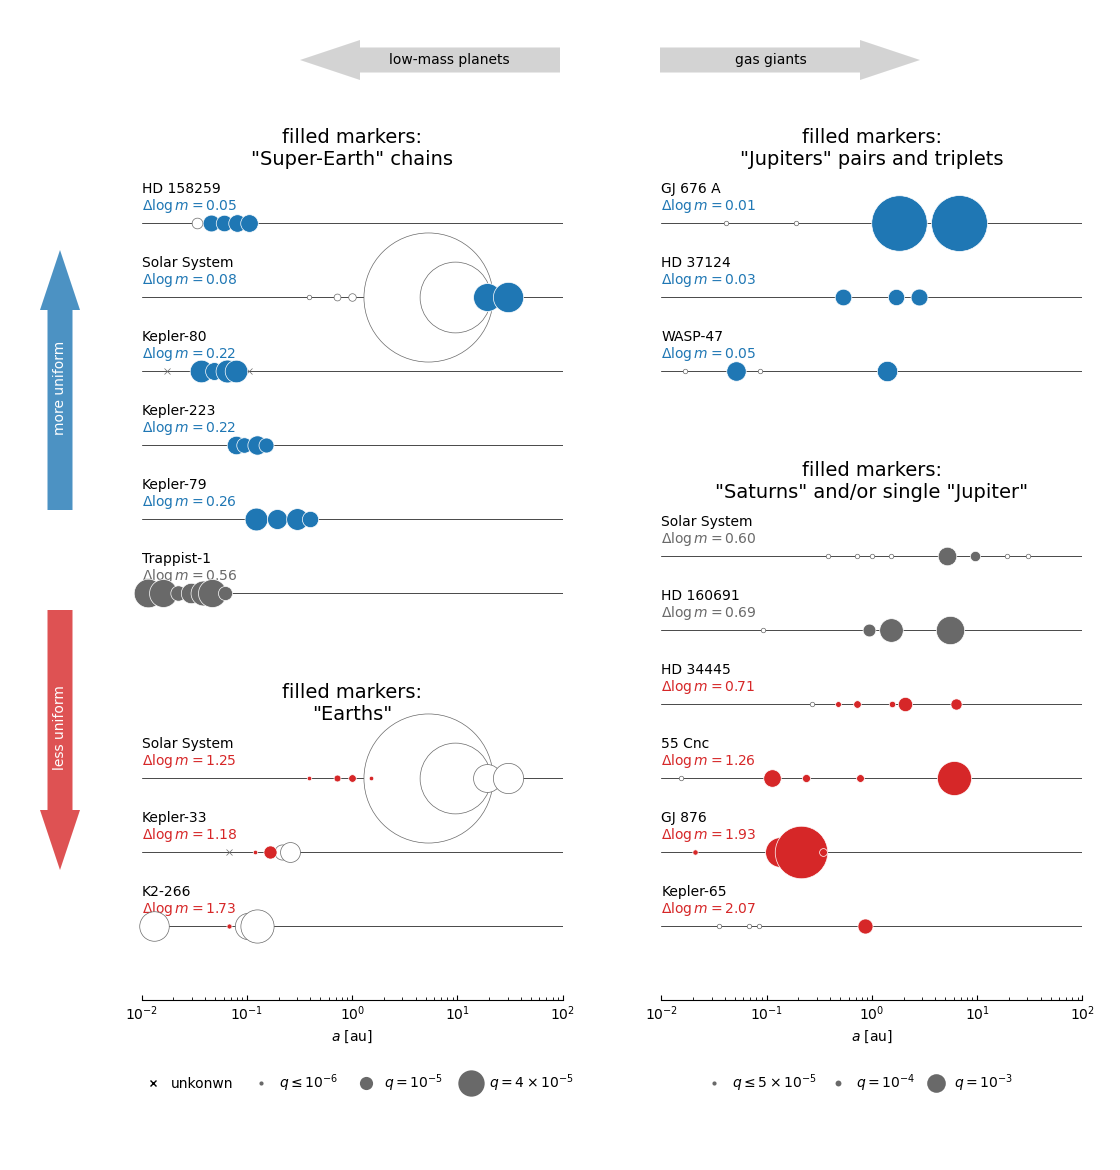

In [71]:
# handpicked systems where the planet types are relatively unambiguous
# (i.e., masses not too close to the upper or lower limit of the pebble isolation mass)

fig, ax = plt.subplots(1,2,figsize=(10,10))

plt.sca(ax[0])
plt.xscale('log'); plt.xlim(1e-2,1e2); plt.xlabel(r'$a$ [au]')
plt.ylim(-11.5,1)
plt.gca().spines[['left','right', 'top']].set_visible(False)
plt.gca().tick_params(which='both',direction='in')
plt.yticks([])

q0 = 1e-4

i_system = 0

t = 'filled markers:\n"Super-Earth" chains'
plt.text(1, i_system, t, ha='center', va='center', fontsize=14)

process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='HD 158259', highlight_inds=[-1])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='Sun', highlight_inds=[-1])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='Kepler-80', highlight_inds=[-1])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='Kepler-223', highlight_inds=[-1])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='Kepler-79', highlight_inds=[-1])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='Trappist-1', highlight_inds=[-1])

i_system -= 1.5

t = 'filled markers:\n"Earths"'
plt.text(1, i_system, t, ha='center', va='center', fontsize=14)

process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='Sun', highlight_inds=[-2])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='Kepler-33', highlight_inds=[-2])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='K2-266', highlight_inds=[-2])


plt.sca(ax[1])
plt.xscale('log'); plt.xlim(1e-2,1e2); plt.xlabel(r'$a$ [au]')
plt.ylim(-11.5,1)
plt.gca().spines[['left','right', 'top']].set_visible(False)
plt.gca().tick_params(which='both',direction='in')
plt.yticks([])

q0 = 5e-3

i_system = 0

t = 'filled markers:\n"Jupiters" pairs and triplets'
plt.text(1, i_system, t, ha='center', va='center', fontsize=14)

process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='GJ 676 A', highlight_inds=[-3])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='HD 37124', highlight_inds=[-3])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='WASP-47', highlight_inds=[-3])

i_system -= 1.5

t = 'filled markers:\n"Saturns" and/or single "Jupiter"'
plt.text(1, i_system, t, ha='center', va='center', fontsize=14)

process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='Sun', highlight_inds=[-3])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='HD 160691', highlight_inds=[-3])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='HD 34445', highlight_inds=[-3])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='55 Cnc', highlight_inds=[-3])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='GJ 876', highlight_inds=[-3])
process_data(data_M23, plot_systems, q_max_max=q0, q_max_min=q0, system_name='Kepler-65', highlight_inds=[-3])

plt.tight_layout(w_pad=5)

ax = fig.add_axes([0, -0.1, 0.5, 0.1])
plt.sca(ax)
plt.axis('off')
plt.plot([],[],'w',marker='x',ms=30*.15,mew=1,mec='k',ls='')
plt.plot([],[],'dimgrey',marker='o',ms=30*.1,mew=0,ls='')
plt.plot([],[],'dimgrey',marker='o',ms=30*np.sqrt(1e-5/1e-4),mew=0,ls='')
plt.plot([],[],'dimgrey',marker='o',ms=30*np.sqrt(4e-5/1e-4),mew=0,ls='')
plt.legend(['unkonwn',r'$q\leq 10^{-6}$',r'$q=10^{-5}$',r'$q=4\times 10^{-5}$'], loc='upper center', ncol=4, frameon=False,
          columnspacing=1.5, handlelength=1)

ax = fig.add_axes([.5, -0.1, 0.5, 0.1])
plt.sca(ax)
plt.axis('off')
plt.plot([],[],'dimgrey',marker='o',ms=30*.1,mew=0,ls='')
plt.plot([],[],'dimgrey',marker='o',ms=30*np.sqrt(1e-4/5e-3),mew=0,ls='')
plt.plot([],[],'dimgrey',marker='o',ms=30*np.sqrt(1e-3/5e-3),mew=0,ls='')
plt.plot([],[],'dimgrey',marker='o',ms=30*np.sqrt(2e-3/5e-3),mew=0,ls='')
plt.legend([r'$q\leq 5\times 10^{-5}$',r'$q=10^{-4}$',r'$q=10^{-3}$'], loc='upper center', ncol=3, frameon=False,
          columnspacing=1, handlelength=1)

ax = fig.add_axes([0, 0.95, 1, 0.1])
plt.sca(ax)
plt.axis('off')
plt.arrow(1,0,4,0,color='lightgrey',width=.5,lw=0,head_width=0.8)
plt.arrow(-1,0,-4,0,color='lightgrey',width=.5,lw=0,head_width=0.8)
plt.text(-2,0,'low-mass planets', ha='right', va='center')
plt.text(2.5,0,'gas giants', ha='left', va='center')
plt.xlim(-10,10)
plt.ylim(-1,1)

ax = fig.add_axes([-.1, 0, .1, 1])
plt.sca(ax)
plt.axis('off')
plt.arrow(0,1,0,4,color='tab:blue',width=.5,lw=0,head_width=0.8, alpha=.8)
plt.arrow(0,-1,0,-4,color='tab:red',width=.5,lw=0,head_width=0.8, alpha=.8)
plt.text(0,-2.5,'less uniform', ha='center', va='top',rotation=90, color='w')
plt.text(0,2.5,'more uniform', ha='center', va='bottom',rotation=90, color='w')
plt.xlim(-1,1)
plt.ylim(-10,10)

#plt.savefig('figures/architecture_summary.pdf', bbox_inches='tight')
plt.show()